<h1>
    Information About This Project
</h1>

<p>
New York City is home to some of the worlds most renoun and prestigious restaurants with a wide variety of different cuisines, franchises, and fusions of food that one can't find anywhere else.
<br>
The restaurant industry in New York City is thriving, earning <a href="https://www.ibisworld.com/industry-trends/market-research-reports/new-york/accommodation-food-services/restaurants-in-new-york.html">$17 Billion USD in 2018  with 31,061 number of businesses and an annual growth rate of 4.6%</a> and an increased projection of profit and new businesses in 2019. 
<br>
Because many New Yorkers and tourists rely on local restaurants it is important to know whether or not the restaurants that we trust are serving us contaminated food. 
<br>
In this project I aim to explore the data from NYC Open Data and try to learn more about the health violation reports from the NYDOH and visualize trends in the data.
<br>
I also intend on implementing machine learning  techniques to find hotspots of violations in the city, and also create an interactive map where it is possible to find where these restaurants are and which health violations they have been cited for.
<br>
</p>

<h1>
    Information About the Data
</h1>

<p> 
    The data set is courtesy of Department of the Health and Mental Hygiene (DOHMH)
    
    This dataset includes NYC restaurant and college cafeteria (hereafter, restaurants) inspection results for up to three
    years prior to the most recent inspection. 
    The purpose is to provide information on recent inspection results. 
    Restaurants that go out of business are removed. Therefore, this dataset is not appropriate for historical analyses of NYC restaurant 
    inspections that compare previous years of data to the current data. 
    In addition, restaurants can choose to go through the adjudication process, i.e., argue their case at an administrative hearing. Restaurants also have
    appeal rights, and the entire adjudication process from start to finish can take several months.
    Scores current as of today may be revised due to adjudication in subsequent weeks or months.  The change in scores due to adjudication is
    another reason why it is not valid to compare current scores to scores from previous years.
</p>

<h1>
        Description of the Columns:
</h1>
<ul>
    <li>
        CAMIS: A unique identifier for each restaurant | 10-digit integer, static per restaurant permit.
   </li>
    
   <li>
        DBA: Restaurant name (Doing Business As) | Public business name, may change at discretion of restaurant owner.
  </li>
    
   <li>      
        BORO: Which NYC Borough the Restaurant is located.
  </li>
    
   <li>     
        BUILDING: Which building the restaurant is located.
  </li>
    
   <li>     
        STREET: Which street the restaurant is located.
  </li>
    
   <li>     
        ZIPCODE: Which ZipCode the restaurant is located.
  </li>
    
   <li>     
        PHONE: The phone number of the restaurant | Phone number provided by restaurant owner/manager.
  </li>
    
   <li>     
        CUISINE DESCRIPTION: Optional field provided by provided by restaurant owner/manager.
  </li>
    
   <li>     
        INSPECTION DATE: Date of most recent health inspection.
  </li>
    
   <li>     
        ACTION: Action taken after inspection.
  </li>
    
   <li>     
        VIOLATION CODE: Code of the violation.
  </li>
  
   <li>    
        VIOLATION DESCRIPTION: Description of the Violation.
  </li>
    
   <li>     
        CRITICAL FLAG: Whether or not the violation was critical | Critical violations are those most likely to contribute to foodborne illness.
  </li>
    
   <li>     
        SCORE: Total score for the inspection.
  </li>
    
   <li>     
        GRADE: Grade associated with the inspection.
  </li>
    
   <li>     
        RECORD DATE: Date that the particular record was updated.
  </li>
    
   <li>     
        Inspection Type: Combination of inspection program and type of inspection performed.
  </li>
    
   <li>    
        Longitude: Geographical Longitude.
  </li>
    
   <li>     
        Latitude: Geographical Latitude.
  </li>
    
   <li>     
        Community Board: Which community board the restaurant is associated with.
  </li>
    
   <li>     
        Council District: Which Council District the restaurant is associated with.
  </li>
    
   <li>    
        Census Tract: Census information.
  </li>
    
   <li>    
        BIN: Building Identification Number
   </li>
    
   <li>     
        BBL: Borough / Block/  Lot number.
   </li>
   <li>     
        NTA: Neighborhood Tabulation Area
    </li>
</ul>


<H1>Installing Prerequisites</H1>

In [1]:
import sys
!{sys.executable} -m pip install folium

<h1>Importing Packages</h1>
<ul>
    <li>
           Folium
    </li>
    <li> 
            Matplotlib
    </li>    
    <li>
            Numpy
    </li>
    <li>
            Pandas
    </li>
    <li>
            SciKit-Learn
    </li>
</ul>

In [2]:
#Imports
import folium as fl
from folium.plugins import FastMarkerCluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

<h1>
    Importing the Data
</h1>

<P>
    After importing the data, the following code will provide some metrics on how many rows and columns are in the data.
</P

In [3]:
print("Loading the data, this may take a few minutes...")

# Storing the data as a Pandas DataFrame:
# Since 'CAMIS' is a unique identifying integer, it can be used as the index.
raw_data = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD', index_col=0)
raw_data.index.name = 'CAMIS'
print("The Data was Successfully Loaded!")

# Checking how many rows and columns are in the data:
print("The shape of the data: " + str(raw_data.shape))
Original_Data_Length = len(raw_data)

Loading the data, this may take a few minutes...
The Data was Successfully Loaded!
The shape of the data: (401085, 25)


<h1>
        Cleaning up the Data
</h1>

<p>
    The first step of data cleanup for this specific data will be dropping columns that are not necessary for the scope of this project.
</p>

In [4]:
# Storing unnecessary column headers into a list:
Unnecessary_Columns = ['NTA', 'BBL', 'BIN', 'Census Tract', 'GRADE DATE', 'Council District', 'INSPECTION TYPE', 'BUILDING','STREET', 'ACTION', 'PHONE', 'RECORD DATE', 'Community Board', 'INSPECTION DATE', 'NTA', 'Council District']

# Dropping the unnecessary columns:
try:
    raw_data.drop(
            Unnecessary_Columns,
            axis=1, 
            inplace=True
    )
    print("The columns: " + str(Unnecessary_Columns) + " have been dropped successfully." )
    
# If a KeyError is thrown it means that this block of code was already executed and thus the columns cannot be dropped again.
except(KeyError):
    print("The columns have already been dropped.")  

The columns: ['NTA', 'BBL', 'BIN', 'Census Tract', 'GRADE DATE', 'Council District', 'INSPECTION TYPE', 'BUILDING', 'STREET', 'ACTION', 'PHONE', 'RECORD DATE', 'Community Board', 'INSPECTION DATE', 'NTA', 'Council District'] have been dropped successfully.


<p>
    Since the remaining columns are necessary for the scope of this project, the remaining <b>missing values</b> will be dropped.
    <br>
</p>

<p>
    It is hard to compare and analyze data that is nonexistent, therefore it is imperative to delete records with empty values.
<br>
    The following code will check each column and see if there are any missing values in them.
<br>
    <B>False</B> = N many values in the column were not empty.
    
<br>
    <B>True</B> = N many values in the column were empty.
</p>

In [5]:
Missing_Values = raw_data.isnull()
        
for Column_Header in Missing_Values.columns.values.tolist():
    print('Column: ' + Column_Header)
    print(str(Missing_Values[Column_Header].value_counts()))
    print()

Column: DBA
False    400674
True        411
Name: DBA, dtype: int64

Column: BORO
False    401085
Name: BORO, dtype: int64

Column: ZIPCODE
False    395522
True       5563
Name: ZIPCODE, dtype: int64

Column: CUISINE DESCRIPTION
False    401085
Name: CUISINE DESCRIPTION, dtype: int64

Column: VIOLATION CODE
False    395272
True       5813
Name: VIOLATION CODE, dtype: int64

Column: VIOLATION DESCRIPTION
False    391900
True       9185
Name: VIOLATION DESCRIPTION, dtype: int64

Column: CRITICAL FLAG
False    391900
True       9185
Name: CRITICAL FLAG, dtype: int64

Column: SCORE
False    384008
True      17077
Name: SCORE, dtype: int64

Column: GRADE
False    202654
True     198431
Name: GRADE, dtype: int64

Column: Latitude
False    400661
True        424
Name: Latitude, dtype: int64

Column: Longitude
False    400661
True        424
Name: Longitude, dtype: int64



<P>
    Since there are a lot of empty values in 'GRADE' and 'DBA', it is not critical to remove the entire row for those two categorical variables, therefore they will be replaced to 'N/A' and 'N' respectively.
<BR>
    'N/A' in DBA represents none available, and 'N' in GRADE represents 'Not Yet Graded' which is consistent with the already existing data in the DataFrame.
</P>

In [6]:
# Grades that are blank can be replaced with an 'N' or not graded yet
raw_data['GRADE'].replace(np.NaN, 'N', inplace=True)

# Restaurants that are missing their name can be replaced with N/A
raw_data['DBA'].replace(np.NaN, 'N/A', inplace=True)

In [7]:
raw_data.dropna(inplace=True)
print('The length of the data before dropping null values: ' + str(len(raw_data)))
print('The length of the data after dropping null values: ' + str(Original_Data_Length - len(raw_data)))

The length of the data before dropping null values: 375614
The length of the data after dropping null values: 25471


<p>
    Now that the missing values have been dropped, the remaining columns are going to have their data types checked to ensure they make sense.
</p>

In [8]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375614 entries, 50090919 to 50000137
Data columns (total 11 columns):
DBA                      375614 non-null object
BORO                     375614 non-null object
ZIPCODE                  375614 non-null float64
CUISINE DESCRIPTION      375614 non-null object
VIOLATION CODE           375614 non-null object
VIOLATION DESCRIPTION    375614 non-null object
CRITICAL FLAG            375614 non-null object
SCORE                    375614 non-null float64
GRADE                    375614 non-null object
Latitude                 375614 non-null float64
Longitude                375614 non-null float64
dtypes: float64(4), object(7)
memory usage: 34.4+ MB
None


<p>
    The ZIPCODE column should be of an int64 datatype, so this will need to be fixed. It does not make sense to have a decimal value within the context of a zipcode.
    <br>
    Also, the DBA and VIOLATION DESCRIPTION have to be cast as object as well. (Some values were picked up as integers in the next cell.)
</p>

In [9]:
# Since it is impossible to convert a None (null) datatype to a Float64, empty records must be dropped.
raw_data['ZIPCODE'].dropna(inplace=True, axis=0)
raw_data['ZIPCODE'] = raw_data['ZIPCODE'].astype('int64')
raw_data.astype({'ZIPCODE': 'int32', 'VIOLATION DESCRIPTION' : 'object', 'DBA' : 'object'}).dtypes

print("The data type of the ZIPCODE column is: " + str(raw_data['ZIPCODE'].dtype))

The data type of the ZIPCODE column is: int64


<p>
    Since there are some rather long Cuisine Descriptions it is necessary to trim their length in order to graph them without having their descriptions dominate the white space of the graph
<br>
    To achieve this, the description will be reduced to just the first word.
</p>

In [10]:
#Going through every Cuisine Description and reducing it to the first word:
raw_data['CUISINE DESCRIPTION'] = raw_data['CUISINE DESCRIPTION'].apply(lambda x : x.split()[0].strip())
print("The cuisine types after shortening them:")
print(raw_data['CUISINE DESCRIPTION'].unique())

The cuisine types after shortening them:
['Japanese' 'Pizza/Italian' 'Latin' 'American' 'Steak' 'Salads' 'Tex-Mex'
 'Spanish' 'Café/Coffee/Tea' 'Mexican' 'Italian' 'Chinese' 'Pizza'
 'Indian' 'Bakery' 'Vegetarian' 'Peruvian' 'Asian' 'Hamburgers' 'French'
 'Korean' 'Soups' 'Donuts' 'Ice' 'Mediterranean' 'Seafood' 'Jewish/Kosher'
 'Thai' 'Ethiopian' 'Chicken' 'Irish' 'Vietnamese/Cambodian/Malaysia'
 'Caribbean' 'Bagels/Pretzels' 'Turkish' 'Egyptian' 'Filipino'
 'Delicatessen' 'Sandwiches/Salads/Mixed' 'Continental' 'Hawaiian' 'Soul'
 'Eastern' 'Tapas' 'Bangladeshi' 'Polish' 'Juice,' 'Middle' 'African'
 'Barbecue' 'Sandwiches' 'Bottled' 'Greek' 'Chinese/Japanese' 'Creole'
 'Pakistani' 'Russian' 'Australian' 'Armenian' 'Hotdogs/Pretzels'
 'Pancakes/Waffles' 'Chilean' 'Czech' 'English' 'German' 'Other'
 'Creole/Cajun' 'Chinese/Cuban' 'Cajun' 'Brazilian' 'Scandinavian'
 'Afghan' 'Iranian' 'Moroccan' 'Portuguese' 'Fruits/Vegetables'
 'Nuts/Confectionary' 'Indonesian' 'Hotdogs' 'Not' 'Southwes

<h1>
    Data Exploration
</h1>

<p>
    Now that the data has been cleaned, there is a lot of valuable information that can be retrieved from the data set to learn more about the health violations that have been reported against the restaurants in New York City.
    <br>
    Since every record pertains to a specific violation, this can be used to gather insights such as how many violations were in each borough, how many violations were deemed 'critical' (most likely to cause illness)
    <br>
    and which violations are the most common.
</p>

<p>
    Which cuisines have the most health violations?
</p>

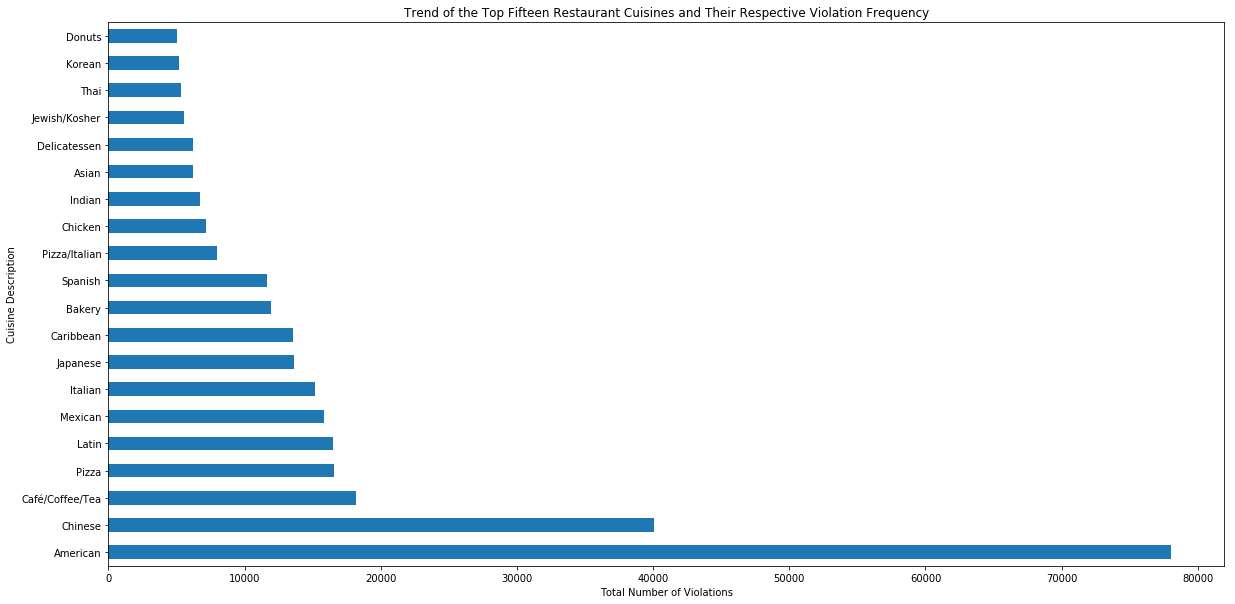

In [11]:
# Getting the value count of each cuisine description and plotting it:
raw_data['CUISINE DESCRIPTION'].value_counts(ascending=False).head(20).plot(
    figsize=(20, 10),
    kind='barh', 
)

plt.ylabel('Cuisine Description')
plt.xlabel('Total Number of Violations')
plt.title('Trend of the Top Fifteen Restaurant Cuisines and Their Respective Violation Frequency')
plt.show()

<p>
It is evident that American restaurants have a significant more health violations than the other cuisine types. But just looking at the amount of violations is not enough to make any conclusions without also analyzing some  other metrics as well.
</p>

<h3>
    Which organizations have the most health violations?
</h3>

In [12]:
print("Organizations with the most health violations:") 
print()
print(raw_data['DBA'].value_counts(ascending=False).head(20))

Organizations with the most health violations:

DUNKIN'                                  3895
SUBWAY                                   2739
STARBUCKS                                1966
MCDONALD'S                               1869
KENNEDY FRIED CHICKEN                    1323
DUNKIN', BASKIN ROBBINS                  1136
CROWN FRIED CHICKEN                      1072
BURGER KING                               971
POPEYES                                   876
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     732
CHIPOTLE MEXICAN GRILL                    660
DOMINO'S                                  568
KFC                                       518
LE PAIN QUOTIDIEN                         503
CHECKERS                                  422
WENDY'S                                   421
PRET A MANGER                             328
VIVI BUBBLE TEA                           320
PAPA JOHN'S                               287
CARVEL ICE CREAM                          282
Name: DBA, dtype: int64


<p>
    Although these are organizations, since they have many different locations in the city, it is unfair to consider them worse offenders due to the fact that their number of violations is skewed by virtue of having multiple stores, which begs the question:
    <br>
</p>


<h3>Which specific restaurants recieved the most health violations?</h3>


In [13]:
raw_data['Number_of_Violations'] = raw_data.index.value_counts()

Restaurant_Violations = raw_data[raw_data.columns].sort_values(by='Number_of_Violations', ascending=False).drop_duplicates(keep='first')
Most_Violations = raw_data[['DBA','CUISINE DESCRIPTION','Number_of_Violations']].sort_values(by='Number_of_Violations', ascending=False).drop_duplicates(keep='first')
Most_Violations.head(15)

,DBA,CUISINE DESCRIPTION,Number_of_Violations
CAMIS,,,
50018552,ORCHID DYNASTY RESTAURANT,Chinese,96
41669112,LA VIE EN SZECHUAN RESTAURANT,Chinese,90
50035784,BIG WONG RESTAURANT,Chinese,89
40400811,CAFE VOLNA,Russian,82
50056245,MING KEE KITCHEN,Chinese,82
40700664,PHO BANG RESTAURANT,Vietnamese/Cambodian/Malaysia,80
50064654,ANPANMAN BAKERY CAFE,Chinese,80
41409441,GOLDEN STEAMER,Bakery,79
50001789,RESTAURANTE & PANADERIA GUATELINDA,Spanish,78


<p>
    When the data is changed to represent the amount of violations per store, the data tells a different story. 
    <br>
    The following graph details the <b> proportion</b> of cuisine descriptions in the top 20 restaurants with the most violations:
</p>

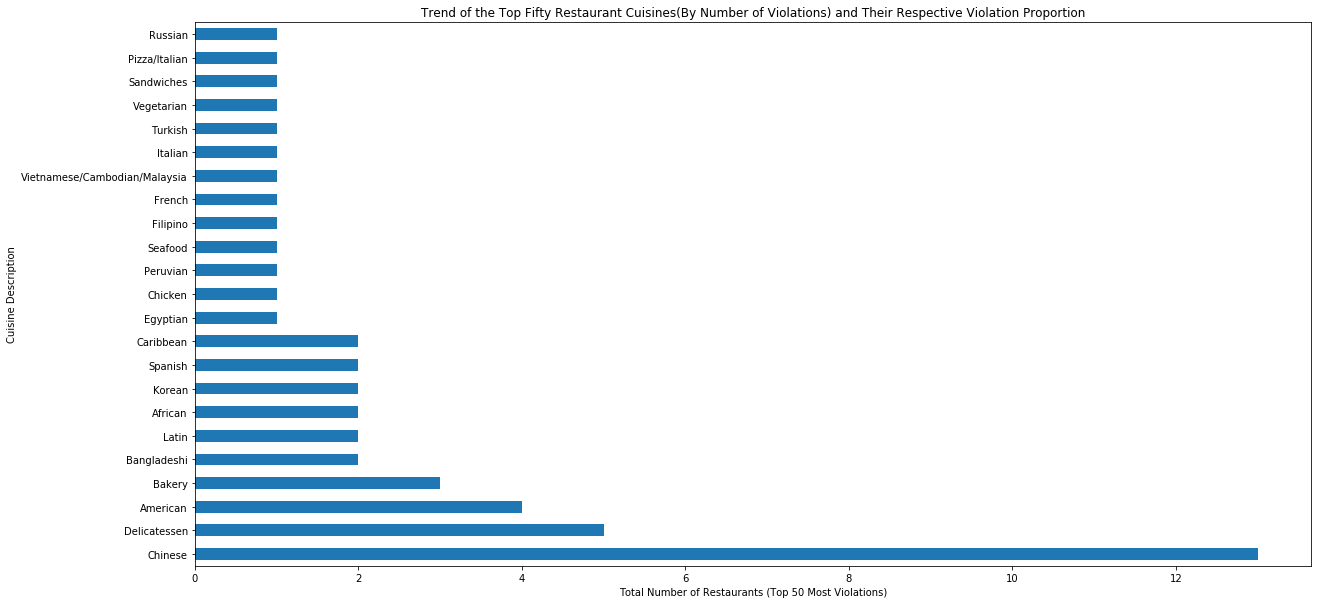

In [14]:
Top_20_Violation_Restaurants = Most_Violations.head(50)
Top_20_Violation_Restaurants['CUISINE DESCRIPTION'].value_counts(ascending=False).plot(
    figsize=(20, 10),
    kind='barh', 
)
plt.ylabel('Cuisine Description')
plt.xlabel('Total Number of Restaurants (Top 50 Most Violations)')
plt.title('Trend of the Top Fifty Restaurant Cuisines(By Number of Violations) and Their Respective Violation Proportion')
plt.show()

<p>
    An interesting bit of information would be to determine exactly what the mean grade is among restaurants after inspection.
    <br>
    Since the grade is a letter grade in the form of A, B, C, it is critical to convert these scores into numerical grades, and then form an average.
    <br>
    Due to the 'N' category representing a 'not graded yet', those records will be ignored.
    <br>
    <br>
    what I hope to achieve by doing this is to see how many restaurants have recieved a grade of 'A' despite having more than 13 violations:
</p>

<p>
    The New York Department of Health's grade breakdown is as follows:
</p>    
    <ul>
        <li>
            "A" grade: 0 to 13 points for sanitary violations (Labeled as 3.0 above)
        </li>
        <li>
            "B" grade: 14 to 27 points for sanitary violations (Labeled as 2.0 above)
         </li>    
         <li>
            "C" grade: 28 or more points for sanitary violations (Labeled as 1.0 above)
        </li>
   </ul>
             <a href="https://a816-health.nyc.gov/ABCEatsRestaurants/#/faq">As cited in the  New York City Department of Health
            </a>
         <br>
         <br>
<p>
    By this metric of looking at pure violations, it is evident based on the data that the majority of violation reports have recieved a grade of 'A', but it also shows that there are a bevy of violations which have recieved poor grades after inspection.
    However it is important to see the big picture and find out which violations are most common, and how many violations are flagged as critical, meaning they have an increased risk of providing health related illness.
</p>

In [15]:
# Converting categorical data into numerical data:
Restaurant_Violations['Numerical_Grades'] = Restaurant_Violations.GRADE.map({'A': 3, 'B': 2, 'C': 1})
#Getting the mean:
Mean_Grade = Restaurant_Violations['Numerical_Grades'].mean()


# Finding out the distribution of grades
print("The distribution of grades:")
print(Restaurant_Violations['Numerical_Grades'].value_counts())
print()

# Printing the mean:
print("The mean inspection grade: " + str(Mean_Grade))

The distribution of grades:
3.0    148226
2.0     24780
1.0      9253
Name: Numerical_Grades, dtype: int64

The mean inspection grade: 2.7625028119324697


<p>
    One other view of the information about grade is by using the score column instead.
    The score column is a numerical grade which represents the score that the restaurant recieved for every inspection.
</p>

In [16]:
Score_Bins = np.linspace(0, max(Restaurant_Violations['SCORE']), 4)
Bin_Names = ["Low:", "Medium: ", "High: "]
Restaurant_Violations['Binned_Scores'] = pd.cut(Restaurant_Violations['SCORE'], Score_Bins, labels=Bin_Names, include_lowest=True)
print(Restaurant_Violations['Binned_Scores'].value_counts(ascending=False))

Low:        352182
Medium:      13215
High:          484
Name: Binned_Scores, dtype: int64


<p>
    Now that we know the number of violations, information regarding the  grades associated to New York Department of Health inspections, and the number of violations per cuisine type, Let's see 
</p>
<br

In [17]:
List_Of_Violations = Restaurant_Violations['VIOLATION CODE'].unique()
print("A list of the different violation codes in the data: ")
print(List_Of_Violations)
print()
print()
print("Health codes and their associated description:")
Violation_Code_Description_sr = Restaurant_Violations[['VIOLATION CODE', 'VIOLATION DESCRIPTION']].apply(lambda x : ': '.join(x), axis=1)
print()
print(Violation_Code_Description_sr.unique())

A list of the different violation codes in the data: 
['06D' '02G' '10F' '06F' '08B' '04L' '09C' '06C' '08A' '06B' '02B' '10G'
 '04H' '10B' '05D' '02H' '04N' '09B' '04D' '10I' '06E' '06A' '04M' '04A'
 '10E' '10D' '10H' '09A' '05F' '08C' '04E' '04J' '03C' '04K' '10A' '05H'
 '04F' '10J' '04O' '02A' '04C' '05B' '03A' '02C' '05C' '05A' '07A' '02I'
 '03E' '06G' '02D' '03B' '05E' '10C' '02F' '02E' '03G' '03D' '04B' '03F'
 '06H' '06I' '04G' '02J' '04I' '20F']


Health codes and their associated description:

['06D: Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.'
 '02G: Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.'
 '10F: Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allo

<p>
    More information about the specific health codes may be found on nyc.gov at the following link.
    <a href="https://www1.nyc.gov/assets/doh/downloads/pdf/rii/ri-violation-penalty.pdf">Health Violation Codes: New York Department of Health
    </a>
</p>

<p>
    Some of the health violation codes are particularly atrocious, involving rodents, roaches, and other pests.
    it would be interesting to see how many restaurants have these types of violations, and where they are:
</p>

<h3>
    How many restaurants have violations relating to pests?
</h3>

In [18]:
Pest_Mask = ['04N', '04L', '08A', '04M', '04K']

Pest_DF = Restaurant_Violations.loc[Restaurant_Violations['VIOLATION CODE'].isin(Pest_Mask)]
print("The number of restaurants with violations relating to pests is: " + str(Pest_DF['Number_of_Violations'].count()))

The number of restaurants with violations relating to pests is: 102646


<h3>
    Which restaurants have the most violations relating to pests?
</h3>

In [19]:
Pest_DF['Number_of_Pest_Violations'] = Pest_DF.index.value_counts()
Pest_DF_Most_Violations = Pest_DF[['DBA','CUISINE DESCRIPTION','Number_of_Pest_Violations']].sort_values(by='Number_of_Pest_Violations', ascending=False).drop_duplicates(subset='DBA')
Pest_DF_Most_Violations.head(50)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DBA,CUISINE DESCRIPTION,Number_of_Pest_Violations
CAMIS,,,
50045370,LIN BAKERY & CAFE,Bakery,35
41409441,GOLDEN STEAMER,Bakery,34
41713504,ISIS RESTAURANT,Mexican,34
50045946,GREENWOOD QUALITY BAKERY,Bakery,34
50016943,EL NUEVO ROBLE BILLIARDS,Spanish,33
40741967,TONG HAI TUNG BAKERY,Chinese,31
41187577,HANSOL NUTRITION CENTER,Korean,31
41259444,COCO ROCO RESTAURANT,Peruvian,31
50064654,ANPANMAN BAKERY CAFE,Chinese,31


<h3>
    Which cuisine types have the most violations relating to pests?
</h3>

Text(0, 0.5, 'Number of Violations')

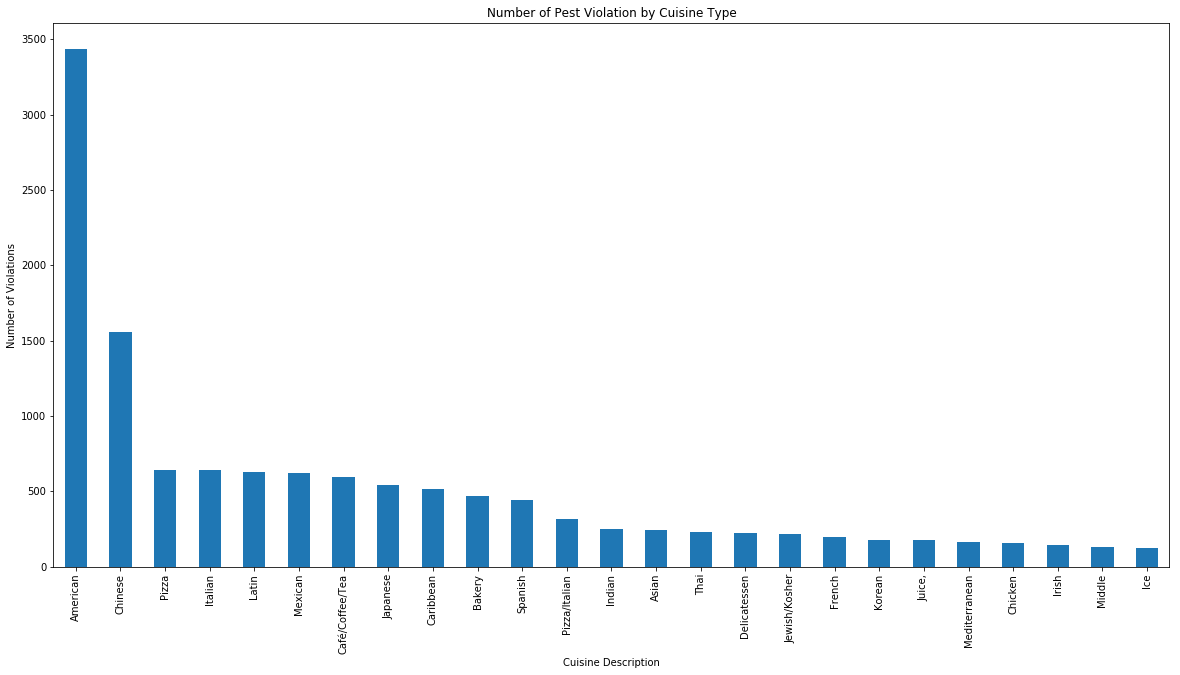

In [20]:
Pest_DF_Most_Violations['CUISINE DESCRIPTION'].value_counts().head(25).plot(kind='bar', figsize=(20,10))
plt.title('Number of Pest Violation by Cuisine Type')
plt.xlabel('Cuisine Description')
plt.ylabel('Number of Violations')

<h1>
    Visualizing the Data With an Interactive Map
</h1>

<p>
    Because it is hard to visualize what this data means in the real world, it is necessary to construct a map with all of the data points of the health violation data. 
    <br>
    What this allows us to do is see exactly where these violations are, and which restaurants they belong to.
    <br>
    In addition to graphing them, the number of violations of each restaurant are appended to the data point to display the restaurant.
    <br>
        Due to memory limitations, only restaurants with violations >= 14  therefore A full view of the dataset can be found at the following link: <br>
        <a href="https://webpage.pace.edu/db19786n/NYC_MAP.html">Map of NYC with Every Violation as a Data Point</a>
    </b>
    It may take a couple of minutes to load, as the HTML file is rather large.
</p>

In [21]:
# This block of code will set a temporary index to the dataframe to drop multiple violations for the same restaurant (we only need one datapoint per restaurant)
Shortened_DF = Restaurant_Violations.reset_index().drop_duplicates(subset='CAMIS', keep='first').set_index('CAMIS')
Shortened_DF = Shortened_DF.loc[Shortened_DF['Number_of_Violations'] >= 14]
Shortened_DF['Number_of_Violations'] = Shortened_DF['Number_of_Violations'].astype('object')
Shortened_DF['Number_of_Violations'].dtype
Shortened_DF['DBA_Number_of_Violations'] = Shortened_DF[['DBA', 'Number_of_Violations']].apply(lambda x : ' | Health Violations: '.join(map(str, x)), axis=1)

# How many rows and columns after reshaping the data:
print(Shortened_DF.shape)

(11415, 15)


<h1>
    Map of Restaurants with over 14 Health Violations
</h1>

In [22]:
def EncodeMap(DataFrame, FoliumMap, DataFrame_Column, color):
    callback = ('function (row) {'
                'var marker = L.marker(new L.LatLng(row[0], row[1]), {color: "' + color + '"});'
                                                                                          'var icon = L.AwesomeMarkers.icon({'
                                                                                          "markerColor: '" + color + "',"
                                                                                                                     "prefix: '',"
                                                                                                                     "extraClasses: 'fa-rotate-0'"
                                                                                                                     '});'
                                                                                                                     'marker.setIcon(icon);'
                                                                                                                     "var popup = L.popup({maxWidth: '500'});"
                                                                                                                     "const display_text = {text: row[2]};"
                                                                                                                     "var Popup_Text = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> ${display_text.text}</div>`)[0];"
                                                                                                                     "popup.setContent(Popup_Text);"
                                                                                                                     "marker.bindPopup(popup);"
                                                                                                                     'return marker};')

    # Add Geolocation marker to cluster:
    FoliumMap.add_child(
        FastMarkerCluster(
            DataFrame[['Latitude', 'Longitude', DataFrame_Column]].values.tolist(), callback=callback
        )
    )
    return FoliumMap
   
NYC_Cluster_Map = fl.Map(location=[40.730610, -73.935242],
                 zoom_start=12,
                 tiles='OpenStreetMap'
                )

EncodeMap(Shortened_DF, NYC_Cluster_Map,'DBA_Number_of_Violations', 'red')
NYC_Cluster_Map

<h1>
    Map of Restaurants With Pest Related Vioaltions
</h1>

In [23]:
# Creating a column to visualize the DBA of the restaurant + number of pest violations on the geographical data point:
Pest_DF['DBA_Number_of_Pest_Violations'] = Pest_DF[['DBA', 'Number_of_Pest_Violations']].apply(lambda x : ' | Pest Violations: '.join(map(str, x)), axis=1)
# Dropping multiple reports for each restaurant: (only one point per restaurant is required)
Pest_DF = Pest_DF.reset_index().drop_duplicates(subset='CAMIS', keep='first').set_index('CAMIS')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
NYC_PEST_MAP = fl.Map(location=[40.730610, -73.935242],
                 zoom_start=12,
                 tiles='OpenStreetMap'
                )
EncodeMap(Pest_DF, NYC_PEST_MAP, 'DBA_Number_of_Pest_Violations', 'gray')


<h1>
    DBSCAN (Density Based Spatial Clustering of Applications with Noise)
</h1>

<p>
    Because there is such a vast amount of  
    DBSCAN is an unsupervised machine learning algorithm which analyzes points of data and clusters them together based on the following parameters:
    <br>
            Epsilon: Euclidean Distance between the points. (Euclidean Distance is the default algorithm)
    <br>
            min_samples: Number of samples that the algorithm will cluster together.
    <br>
    <br>
            Some of the advantages of DBSCAN are:
    <ul>
        <li>
            DBSCAN is efficient in comparison to other algorithms when dealing with large sample sizes (Worst case O(N²)
        </li>
        <li>
             The number of clusters are not required to be known beforehand.
        </li>
        <li>
            DBSCAN can form arbitrary (unusual) shapes.
        </li>
    </ul>
    As with any algorithm, there are a few drawbacks to DBSCAN as well:
       <ul>
        <li>
            It relies on the distance of the points, which is not necessarily the best indicated for 'similar' samples.
        </li>
        <li>
             DBSCAN is very sensitive to its parameters. If incorrectly set, they can produce poor clusters.
        </li>
        <li>
            DBSCAN can run into issues when dealing with clusters with different distances.
        </li>
    </ul>
</p>

<p>
    The first step for creating the model is getting the coordinates of all individual restaurants, and putting them into a matrix.
</p>

In [25]:
# Creating a feature matrix and setting the parameters for DBSCAN:
DBS_DF = Shortened_DF
Coordinates_df = pd.DataFrame(DBS_DF[['Latitude', 'Longitude']])
x = DBS_DF['Longitude'].values.tolist()
y = DBS_DF['Latitude'].values.tolist()
Feature_Matrix = np.array(np.column_stack((x, y)))                                    
print(Feature_Matrix)

[[-74.00045022  40.61401477]
 [-73.98425017  40.74742071]
 [-73.99819994  40.71611773]
 ...
 [-73.80292003  40.76118497]
 [-74.00411259  40.71977096]
 [-73.76273189  40.76126262]]


Now that the feature matrix is constructed, it can be used to train the DBSCAN model with the parameters epsilon and min_samples:

In [26]:
# Training the model:
DBS = DBSCAN(eps=0.010, min_samples=100, n_jobs=-1).fit(Feature_Matrix)
DBS_Labels = DBS.labels_
print(DBS)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=-1, p=None)


<p>
    Now that the model has been trained, it can be used to find the number of clusters based on the samples using the model:
</p>

In [27]:
# Differentiating clustered samples and outliers
Unique_Labels = set(DBS_Labels)
Number_of_Clusters = len(Unique_Labels) - (1 if -1 in DBS_Labels else 0)
print("There are: " + str(Number_of_Clusters) + " clusters in the data set.")

There are: 10 clusters in the data set.


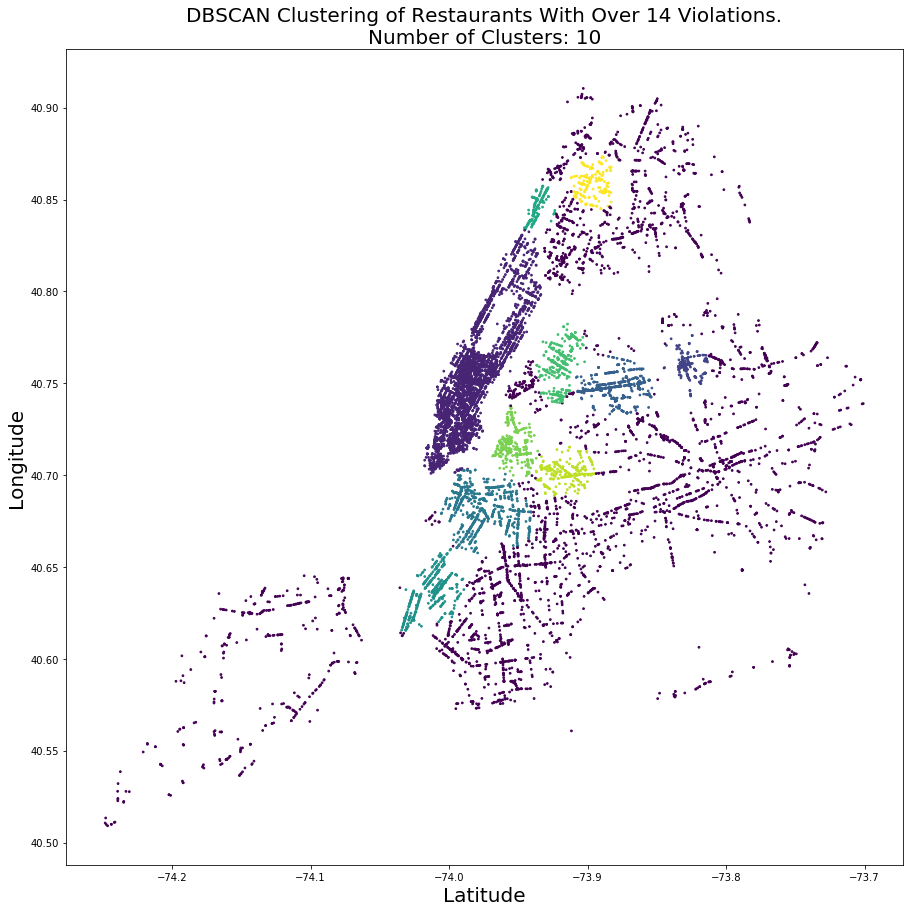

In [28]:
figure = plt.figure(figsize=(15, 15))
plt.scatter(Feature_Matrix[:, 0], Feature_Matrix[:, 1], c=DBS_Labels, s=3)
plt.title('DBSCAN Clustering of Restaurants With Over 14 Violations.' '\n' 'Number of Clusters: ' + str(Number_of_Clusters), fontsize=20)
plt.xlabel('Latitude',  fontsize=20)
plt.ylabel('Longitude',  fontsize=20)
plt.show()

<p>
    Based on the results from the DBSCAN clustering, it is evident the highest density clusters are:
        <ul>
            <li>
                Lower Manhattan - Midtown
            </li>
            <li>
                Washington Heights
            </li>
            <li>
                Astoria 
            </li>
            <li>
                Williamsburg / Green Point
            </li>
            <li>
                Carol Gardens
            </li>
            <li>
                Bay Ridge
            </li>
            <li>
                Jackson Heights
            </li>
            <li>
                Flushing
            </li>
            <li>
                Central Bronx
            </li>
        </ul>
        <br>
            This means that these are high concentrations of restaurants with over 14 food violations, which is reasonable considering these are all popular food hubs in New York City. These areas contain a high volume of restaurants, and thus would also contain a high volume of restaurant violations as well.         
</p>

<h1>
    Conclusions
</h1>

<p>
    Although there were a lot of violations reported, it appears that the New York Department of Health is doing their part in preventing food related illness. 
    <br>
    Despite this, there is an alarming amount of restaurants operating with a history of pests, rodents, and other atrocious violations scattered around the city. 
    <br>
    What is even more shocking about the data is that some restaurants have a history of dozens of pest related health violations and these restaurants are still allowed to operate, and have high ratings on popular review websites.
    <br>
    Due to the sheer number of restaurants with violations it would be impossible to avoid all of them, therefore it is important to do proper research before eating somewhere untrustworthy.
</p>